In [1]:
import groups_config as cfg

preprocessed_dataset_folder = cfg.preprocessed_dataset_folder
group_sizes_to_create = cfg.group_sizes_to_create
group_similarity_to_create = cfg.group_similarity_to_create
group_number = cfg.group_number

print(group_number)

20


In [2]:
import pandas as pd

ratings_df = pd.read_csv(preprocessed_dataset_folder+"/XWines_Slim_150K_ratings.csv") 
display(ratings_df.head(10))

/var/folders/8_/f8kmzr5j715637z3t60_pjqm0000gn/T/ipykernel_3207/1473584662.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv(preprocessed_dataset_folder+"/XWines_Slim_150K_ratings.csv")


,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38
5,876,1211463,111395,1955,5.0,2021-12-02 23:12:49
6,1005,1076348,111433,1955,4.5,2021-06-19 19:53:56
7,1020,1147051,111429,1955,5.0,2018-07-08 20:09:46
8,1029,1225931,111431,1955,5.0,2017-04-24 01:41:52
9,1399,1197513,111415,1958,5.0,2014-07-04 01:07:16


# Similarity evaluation

Evaluation of the similarity between all the pairs o users in the dataset.

In [3]:
# computing similarity between each pair of users

import numpy as np

user_matrix = ratings_df.pivot_table(columns='WineID', index='UserID', values='Rating')

user_id_set = set(ratings_df['UserID'])
user_id_indexes = user_matrix.index.values
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

# display(sim_matrix)
# display(list(user_id_indexes))
# display(user_id_set)

## Visualization of the similarity distribution

Text(0.5, 0, "Pearson's Correlation Coeficient")

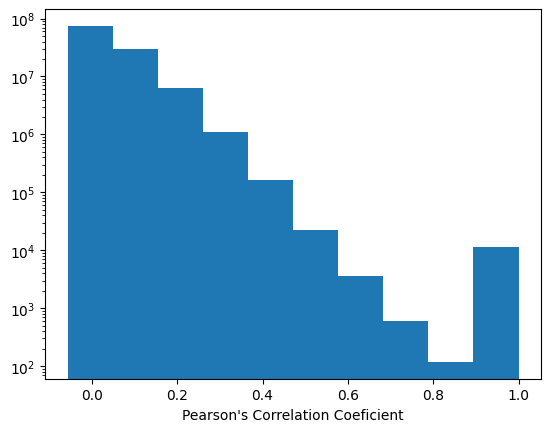

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")


In [5]:
from groups_generators import GroupsGenerator

group_list = list()
for group_type in group_similarity_to_create:
    print(group_type)
    grpGenerator = GroupsGenerator.getGroupsGenerator(group_type)
    current_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    
    display(pd.DataFrame.from_records(current_list))
    
    group_list = group_list + current_list

RANDOM
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,random,"[1110381, 1212243]",-0.006469
1,2,random,"[1180876, 1006585]",-0.015370
2,2,random,"[1174271, 1159745]",-0.015015
3,2,random,"[1223585, 1150327]",0.105930
4,2,random,"[1822155, 1138489]",0.163505
5,2,random,"[1408615, 1078014]",-0.009441
6,2,random,"[1182409, 1049848]",-0.011788
7,2,random,"[1141405, 1069807]",-0.012662
8,2,random,"[1029280, 1184753]",0.112663
9,2,random,"[1194797, 1149843]",0.040426


SIMILAR
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar,"[1785820, 1003121]",1.000000
1,2,similar,"[1270073, 2049542]",1.000000
2,2,similar,"[1203383, 1217972]",0.648536
3,2,similar,"[2056705, 1144545]",0.629825
4,2,similar,"[1512863, 1666961]",1.000000
5,2,similar,"[1084397, 1065401]",0.695885
6,2,similar,"[1159609, 1305310]",1.000000
7,2,similar,"[1002695, 1192140]",0.613342
8,2,similar,"[1665977, 1218495]",1.000000
9,2,similar,"[1816557, 1977712]",1.000000


DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,divergent,"[1167668, 1236509]",0.057114
1,2,divergent,"[1670966, 1008704]",-0.014283
2,2,divergent,"[1408615, 1178383]",-0.012944
3,2,divergent,"[1091691, 1021207]",-0.013648
4,2,divergent,"[1279170, 1277804]",-0.013857
5,2,divergent,"[1209459, 1642219]",-0.003727
6,2,divergent,"[1327698, 1100584]",-0.008353
7,2,divergent,"[1356567, 1285348]",0.145835
8,2,divergent,"[1281181, 1167049]",-0.004881
9,2,divergent,"[1223497, 1076992]",-0.012068


SIMILAR_ONE_DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar_one_divergent,"[1636893, 1172655]",-0.012160
1,2,similar_one_divergent,"[1272615, 1281873]",-0.009845
2,2,similar_one_divergent,"[1035982, 1118173]",-0.008830
3,2,similar_one_divergent,"[1022618, 1003555]",0.064566
4,2,similar_one_divergent,"[1778980, 1088796]",-0.012712
5,2,similar_one_divergent,"[1195171, 1052594]",0.041107
6,2,similar_one_divergent,"[1221354, 1222470]",-0.019320
7,2,similar_one_divergent,"[1006835, 1009945]",0.151775
8,2,similar_one_divergent,"[1219314, 1084348]",0.065436
9,2,similar_one_divergent,"[1365837, 1269327]",-0.019431


In [6]:
# group_list = group_list_random + group_list_similar + group_list_divergent + group_list_sim_one_div
#group_list = group_list_sim_one_div

group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group
display(group_dict)

{0: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1110381, 1212243],
  'avg_similarity': -0.006468706422221324},
 1: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1180876, 1006585],
  'avg_similarity': -0.015370415951265069},
 2: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1174271, 1159745],
  'avg_similarity': -0.015015187467227298},
 3: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1223585, 1150327],
  'avg_similarity': 0.10592990752170187},
 4: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1822155, 1138489],
  'avg_similarity': 0.16350464897478545},
 5: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1408615, 1078014],
  'avg_similarity': -0.009440918525108418},
 6: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1182409, 1049848],
  'avg_similarity': -0.01178841243800164},
 7: {'group_size': 2,
  'group_similarity': 'r

In [7]:
# simple similarity viewer per group
np.set_printoptions(precision=4, suppress=True)
idx = 200
member_index = [user_id_indexes.tolist().index(member) for member in group_dict[idx]["group_members"]]
s = sim_matrix[member_index]
s[:,member_index]

array([[ 1.    ,  1.    ,  1.    , -0.0033],
       [ 1.    ,  1.    ,  1.    , -0.0033],
       [ 1.    ,  1.    ,  1.    , -0.0033],
       [-0.0033, -0.0033, -0.0033,  1.    ]])

In [8]:
import pickle
pickle.dump(group_dict, open(preprocessed_dataset_folder+"/group_composition.pkl", "wb"))

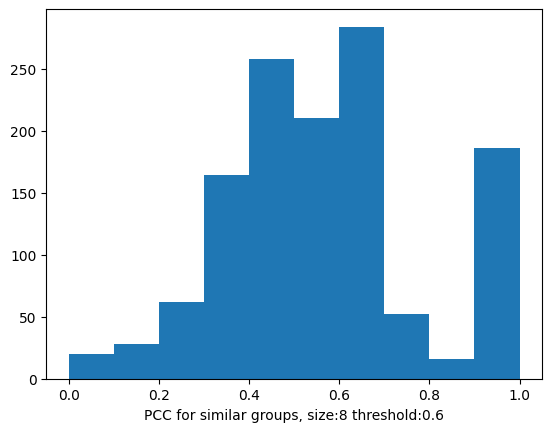

In [9]:
group_similarity = "similar"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.similar_threshold))    
# plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.similar_threshold*10))+".png", dpi=300)

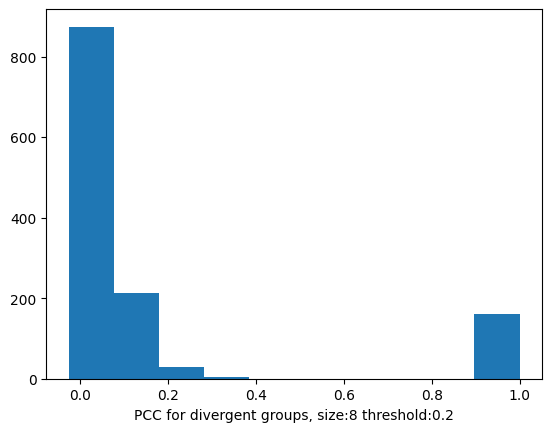

In [10]:
group_similarity = "divergent"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.dissimilar_threshold))    
# plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.dissimilar_threshold*10))+".png", dpi=300)

In [11]:
groups_list = list()
for group in group_dict:
    groups_list.append(
        {
            'group_id': group,
            'group_size': group_dict[group]['group_size'],
            'group_similarity': group_dict[group]['group_similarity'],
            'group_members': group_dict[group]['group_members'],
            'avg_similarity': group_dict[group]['avg_similarity']
        }
    )

groups_df = pd.DataFrame.from_records(groups_list)
display(groups_df.head(10))

,group_id,group_size,group_similarity,group_members,avg_similarity
0,0,2,random,"[1110381, 1212243]",-0.006469
1,1,2,random,"[1180876, 1006585]",-0.015370
2,2,2,random,"[1174271, 1159745]",-0.015015
3,3,2,random,"[1223585, 1150327]",0.105930
4,4,2,random,"[1822155, 1138489]",0.163505
5,5,2,random,"[1408615, 1078014]",-0.009441
6,6,2,random,"[1182409, 1049848]",-0.011788
7,7,2,random,"[1141405, 1069807]",-0.012662
8,8,2,random,"[1029280, 1184753]",0.112663
9,9,2,random,"[1194797, 1149843]",0.040426


### Comparing groups internal average similarity between the different types and sizes 

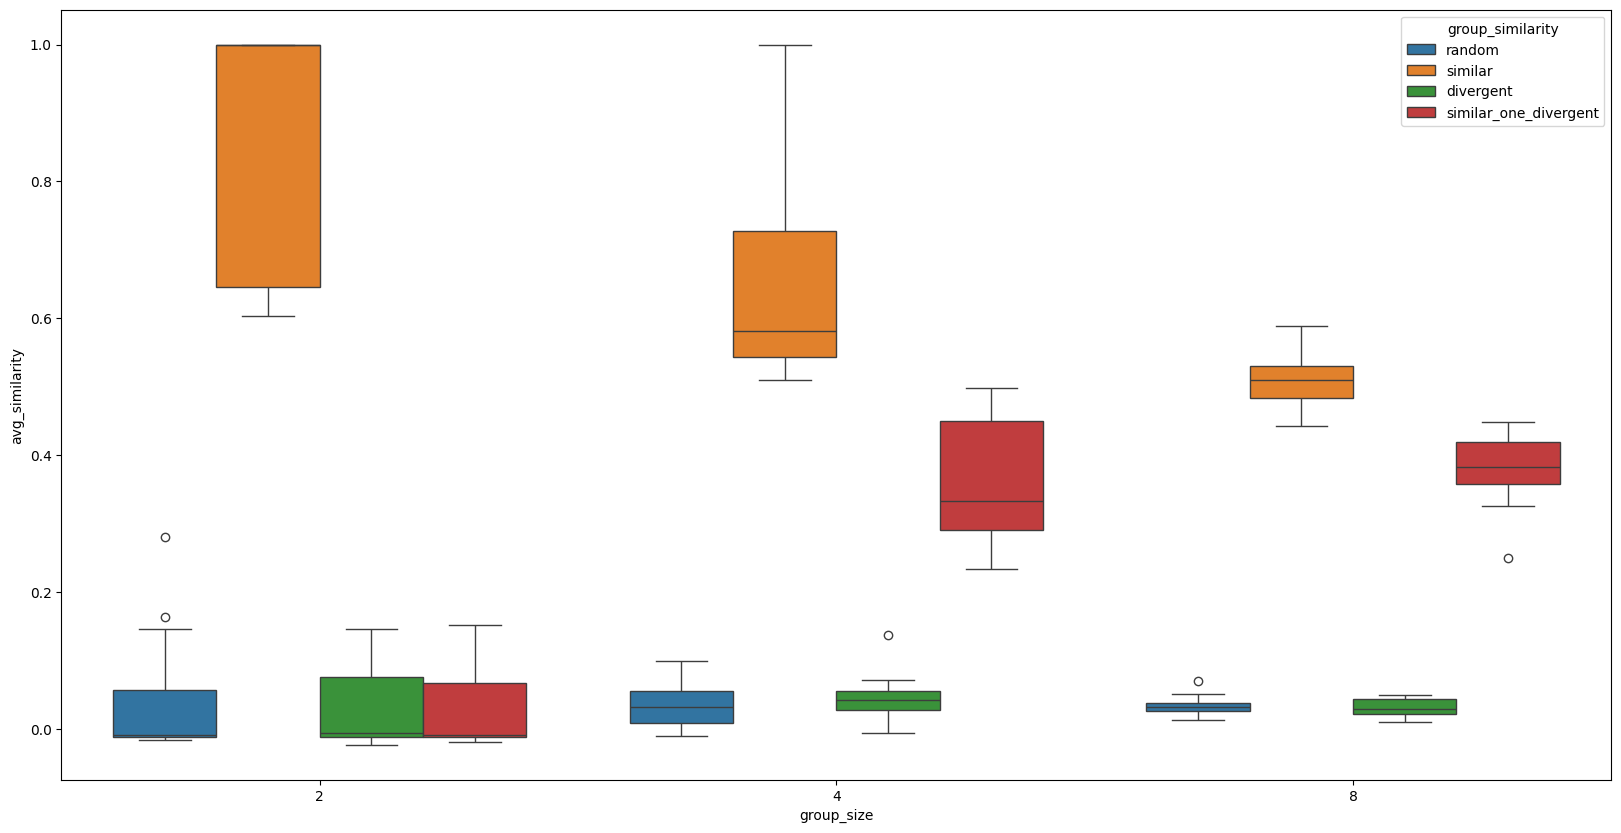

In [12]:
import seaborn as sns


plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt

In [13]:
groups_df.to_csv(preprocessed_dataset_folder+"/group_composition.csv")